### 네이버 얼굴 인식(CFR)

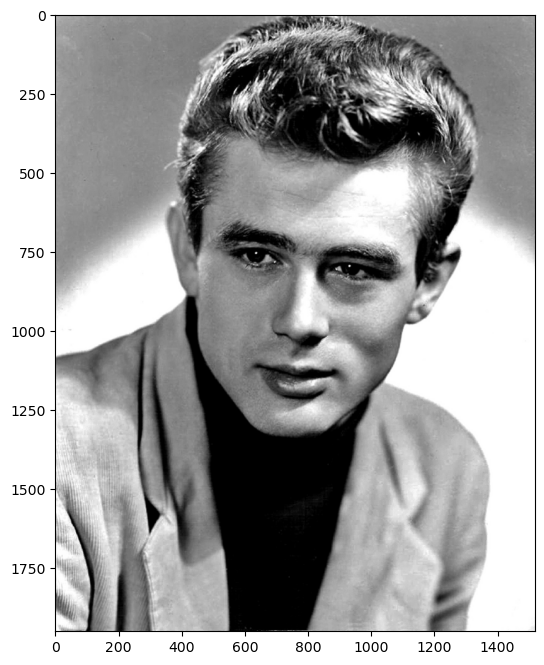

{"info":{"size":{"width":1518,"height":1950},"faceCount":1},"faces":[{"celebrity":{"value":"정우성","confidence":0.23973}}]}


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(10, 8)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print(response.text)
else:
    print("Error Code:" + rescode)

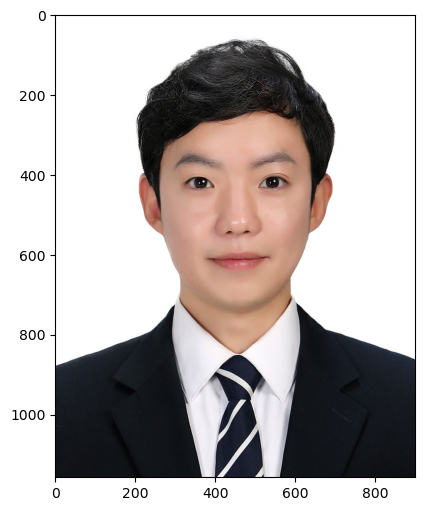

{
    "info": {
        "size": {
            "width": 900,
            "height": 1157
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "송시연",
                "confidence": 0.472604
            }
        }
    ]
}
<class 'str'>
{'info': {'size': {'width': 900, 'height': 1157}, 'faceCount': 1}, 'faces': [{'celebrity': {'value': '송시연', 'confidence': 0.472604}}]}


In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests
import json

img = mpimg.imread("./datas/me.jpg")
plt.figure(figsize=(8, 6)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('./datas/me.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
parsed = json.loads(response.text)

# 딕셔너리를 json.dumps 처리하면 json데이터로 저장함
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))
print(type(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)))

# print(response.text)
# print(type(response.text))

if(rescode==200):
    print(parsed)
    # print(type(parsed)) # 파이썬 딕셔너리
else:
    print("Error Code:" + rescode)

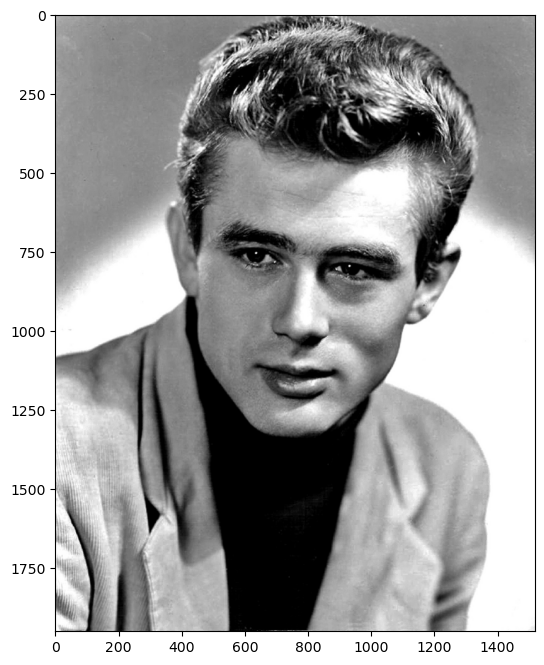

{'info': {'size': {'width': 1518, 'height': 1950}, 'faceCount': 1}, 'faces': [{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678}, 'landmark': {'leftEye': {'x': 634, 'y': 746}, 'rightEye': {'x': 952, 'y': 797}, 'nose': {'x': 760, 'y': 981}, 'leftMouth': {'x': 625, 'y': 1105}, 'rightMouth': {'x': 902, 'y': 1133}}, 'gender': {'value': 'male', 'confidence': 0.999999}, 'age': {'value': '26~30', 'confidence': 0.160886}, 'emotion': {'value': 'neutral', 'confidence': 0.999995}, 'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]}


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import requests
import json

img = mpimg.imread("./datas/face_detection1.jpg")
plt.figure(figsize=(10, 8)) # 그래프 크기 확대(가로인치, 세로인치)
plt.imshow(img)
plt.show()

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴인식
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
detect_result = json.loads(response.text)

if(rescode==200):
    print(detect_result)
else:
    print("Error Code:" + rescode)

In [31]:
detect_result.keys()

detect_result['faces'] # roi: rectangle of information

detect_result['faces'][0]['roi'] # face 키가 리스트

detect_result['faces'][0]['gender']

detect_result['faces'][0]['emotion']

detect_result.values()

x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

# 사진 위에 정보를 출력하기 위해
annotation = f"{gender}: {gen_confidence}\n{emotion}: {emo_confidence}\n{age}: {age_confidence}"

print(annotation)
# print(gender)
# print(gender_confidence)
# print(x, y, w, h)

dict_keys(['info', 'faces'])

## 얼굴 인식 정보 출력
### 인식된 얼굴 사진 박스 넣기

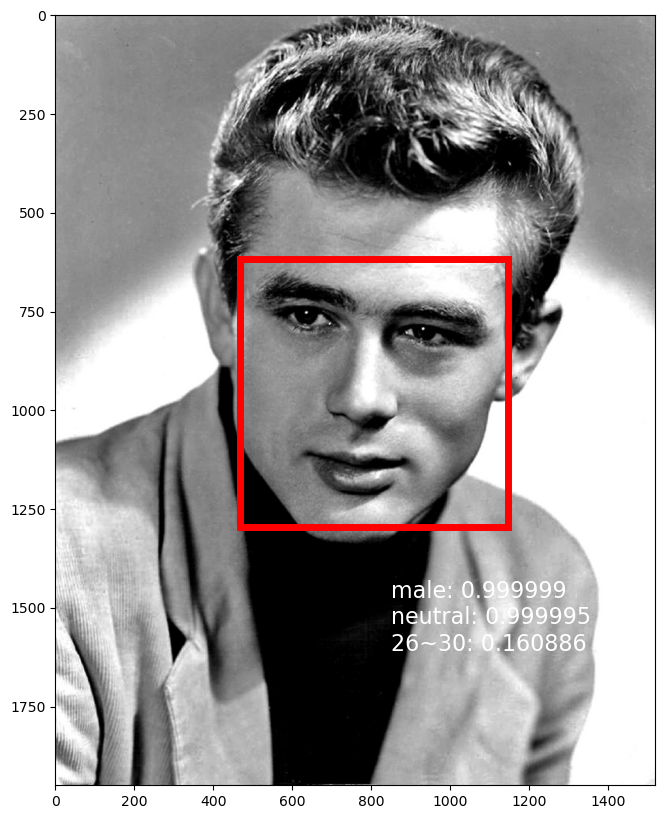

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import sys
import requests
import json

client_id = "Gr3DZKpSitjNw83linRK"
client_secret = "CM1z5bCrQ6"
url = "https://openapi.naver.com/v1/vision/face" # 얼굴인식
files = {'image': open('./datas/face_detection1.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
# post()로 보내기
response = requests.post(url, files=files, headers=headers)
rescode = response.status_code
detect_result = json.loads(response.text)

# values()로 값을 받고 값을 변수에 대입
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emo_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()
annotation = f"{gender}: {gen_confidence}\n{emotion}: {emo_confidence}\n{age}: {age_confidence}"

img = mpimg.imread("./datas/face_detection1.jpg")
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
# 얼굴인식 박스 그리기(linewidth는 선굵기, edgecolor는 테두리색, facecolor는 배경색(채움색))
rect_face = patches.Rectangle((x, y), w, h, linewidth=5, edgecolor='red', facecolor='none')
ax.add_patch(rect_face)
# plt.text()는 사진에 글자를 입력하는 함수
plt.text(850, 1600, annotation, wrap=True, color='white', fontsize='16')

plt.show()